# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
data = requests.get(btc_url).json()['data']
price_btc = data[list(data.keys())[0]]['quotes']['CAD']['price']

# # Fetch current ETH price
data = requests.get(eth_url).json()['data']
price_eth = data[list(data.keys())[0]]['quotes']['CAD']['price']

# # Compute current value of my crpto
my_btc_value = my_btc * price_btc
my_eth_value = my_eth * price_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f} CAD")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f} CAD")

The current value of your 1.2 BTC is $74609.67 CAD
The current value of your 5.3 ETH is $26366.31 CAD


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    key_id=alpaca_api_key,
    secret_key=alpaca_secret_key,
    api_version='v2'
)

In [8]:
# Format current date as ISO format
today = pd.to_datetime("today").isoformat()

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df = api.get_barset(tickers, timeframe=timeframe, limit=1000).df

# Preview DataFrame
df.tail()

AGG                                         SPY  \
                             open     high     low   close     volume    open   
time                                                                            
2021-12-08 00:00:00-05:00  114.37  114.370  114.05  114.17  7416826.0  468.70   
2021-12-09 00:00:00-05:00  114.28  114.386  114.12  114.20  8223995.0  468.15   
2021-12-10 00:00:00-05:00  114.37  114.510  114.22  114.24  6263328.0  469.23   
2021-12-13 00:00:00-05:00  114.51  114.705  114.46  114.60  4006984.0  470.19   
2021-12-14 00:00:00-05:00  114.46  114.540  114.26  114.41  6247899.0  463.05   

                                                                 
                               high     low   close      volume  
time                                                             
2021-12-08 00:00:00-05:00  470.0000  466.83  469.54  62917411.0  
2021-12-09 00:00:00-05:00  469.6291  466.14  466.34  54963509.0  
2021-12-10 00:00:00-05:00  470.9000  466.51  470.72  64958435.0  
2021-12-13 00:00:00-05:00  470.5600  466.27  466.61  53533452.0  
2021-12-14 00:00:00-05:00  465.7400  460.25  463.39  84376354.0

In [9]:
# Pick AGG and SPY close prices
df_close = df[[('AGG', 'close'), ('SPY', 'close')]].droplevel(1, axis=1)
agg_close_price, spy_close_price = df_close.iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.41
Current SPY closing price: $463.39


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23169.50
The current value of your 200 AGG shares is $22882.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_crypto_value = my_btc_value + my_eth_value
my_shares_value = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame.from_dict(
    {
        'crypto': [my_crypto_value],
        'shares': [my_shares_value],
    },
    orient='index',
    columns=['amount']
)

# Display savings DataFrame
print(df_savings.head())

              amount
crypto  100975.97591
shares   46051.50000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

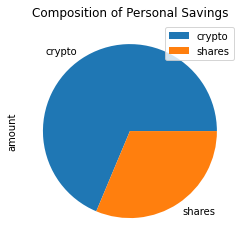

In [12]:
# Plot savings pie chart
df_savings.plot.pie(title='Composition of Personal Savings', y='amount')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    message = 'Congratulations! You have enough money in your emergency fund.'
elif total_savings == emergency_fund:
    message = 'Congratulations! You have reached your emergency fund financial goal.'
else:
    message = f'You are still ${round(emergency_fund - total_savings, 2)} away from reaching your emergency fund financial goal.'
print(message)

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
date_today = pd.to_datetime("today").tz_localize('Australia/Sydney').tz_convert(None)
date_5yrs_ago = (date_today - pd.DateOffset(years=5))
start_date = date_5yrs_ago.isoformat()
end_date = date_today.isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

# Pull data and append to a list then concatenate at the end for better efficiency
api_limit = 1000
to_date = end_date
stock_data_list = []
# Pull data and drop invalid rows
historical_data = api.get_barset(
    tickers,
    timeframe=timeframe,
    limit=api_limit,
    start=start_date,
    end=to_date,
).df.dropna()
# Keep pulling data until you get all the way to the start date
while historical_data.index[0].isoformat() > start_date:
    # Append all rows except the first row as that will be added in the next iteration
    stock_data_list.append(historical_data.iloc[1:].copy())
    # update the ending date to pull older data
    to_date = historical_data.index[0].isoformat()
    # TODO: Add a delay to obey the rate limit of 200 requests every minute per API key
    historical_data = api.get_barset(
        tickers,
        timeframe=timeframe,
        limit=api_limit,
        start=start_date,
        end=to_date,
    ).df.dropna()
stock_data_list.append(historical_data.copy())

# Concatenate all the data into a single dataframe and sort the index
df_stock_data = pd.concat(stock_data_list).sort_index()
# Select only the data between the start and end dates
df_stock_data = df_stock_data.loc[start_date:end_date]
# Drop duplicate rows if necessary
if True in (df_stock_data.duplicated().value_counts().index):
    df_stock_data.drop_duplicates(inplace=True)
    print('Dropped duplicate rows.')

# Display sample data
df_stock_data.head()

AGG                                         \
                             open      high      low    close     volume   
time                                                                       
2016-12-16 00:00:00-05:00  107.16  107.3850  107.060  107.220  2805978.0   
2016-12-19 00:00:00-05:00  107.40  107.5500  107.349  107.520  2839002.0   
2016-12-20 00:00:00-05:00  107.30  107.4366  107.270  107.415  2669160.0   
2016-12-21 00:00:00-05:00  107.50  107.6600  107.430  107.630  3738002.0   
2016-12-22 00:00:00-05:00  107.34  107.4600  107.240  107.390  3493468.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-12-16 00:00:00-05:00  226.01  226.08  224.67  225.07  73808811.0  
2016-12-19 00:00:00-05:00  225.25  226.02  225.08  225.49  49697438.0  
2016-12-20 00:00:00-05:00  226.15  226.57  225.88  226.37  38675955.0  
2016-12-21 00:00:00-05:00  226.25  226.45  225.77  225.81  34922914.0  
2016-12-22 00:00:00-05:00  225.60  225.74  224.92  225.43  36369077.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_yrs_forecast = 30
MC_30_yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*num_yrs_forecast
)

In [17]:
# Printing the simulation input data
MC_30_yrs.portfolio_data.head()

AGG                                         \
                             open      high      low    close     volume   
time                                                                       
2016-12-16 00:00:00-05:00  107.16  107.3850  107.060  107.220  2805978.0   
2016-12-19 00:00:00-05:00  107.40  107.5500  107.349  107.520  2839002.0   
2016-12-20 00:00:00-05:00  107.30  107.4366  107.270  107.415  2669160.0   
2016-12-21 00:00:00-05:00  107.50  107.6600  107.430  107.630  3738002.0   
2016-12-22 00:00:00-05:00  107.34  107.4600  107.240  107.390  3493468.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-12-16 00:00:00-05:00          NaN  226.01  226.08  224.67  225.07   
2016-12-19 00:00:00-05:00     0.002798  225.25  226.02  225.08  225.49   
2016-12-20 00:00:00-05:00    -0.000977  226.15  226.57  225.88  226.37   
2016-12-21 00:00:00-05:00     0.002002  226.25  226.45  225.77  225.81   
2016-12-22 00:00:00-05:00    -0.002230  225.60  225.74  224.92  225.43   

                                                    
                               volume daily_return  
time                                                
2016-12-16 00:00:00-05:00  73808811.0          NaN  
2016-12-19 00:00:00-05:00  49697438.0     0.001866  
2016-12-20 00:00:00-05:00  38675955.0     0.003903  
2016-12-21 00:00:00-05:00  34922914.0    -0.002474  
2016-12-22 00:00:00-05:00  36369077.0    -0.001683

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Vincent\Documents\Coding\repos\financial-planner\src\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010101,1.005954,1.008709,0.994851,1.009154,1.010620,1.013131,1.008721,0.999677,0.990353,...,0.999914,0.998681,0.993793,1.000382,1.014125,1.001474,0.997627,0.992195,0.996402,1.006777
2,1.014385,1.011464,1.008615,0.986225,1.018700,1.018391,1.019461,1.007256,1.002537,1.007650,...,0.988067,1.012927,0.996694,1.005282,1.018986,0.998298,0.994315,0.988551,1.006654,1.003087
3,1.014767,1.013813,1.006925,0.978615,1.003875,1.016506,1.019567,1.007278,1.011321,1.010536,...,0.987218,1.016111,0.996456,0.998111,1.010188,0.989689,0.997871,0.980618,1.009394,0.989710
4,1.027491,1.014596,1.020397,0.979309,1.000562,1.006311,1.024206,1.013603,1.008119,1.016829,...,0.985470,1.018086,1.007895,1.013801,1.000936,0.986268,0.987228,0.984802,1.024200,0.979047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,36.365913,27.240524,61.201997,9.857852,12.784328,31.486985,14.868189,18.265918,28.414231,24.579241,...,22.512382,46.332006,25.533859,34.528704,29.880293,5.407077,16.925345,9.945397,14.988769,30.417902
7557,37.009975,26.806471,61.186305,9.761321,13.016085,31.440294,15.024033,18.116313,28.650104,24.592604,...,22.291148,46.289336,25.567155,34.410379,29.755245,5.386923,16.867656,9.922845,14.809777,30.483377
7558,37.298822,26.890474,61.164747,9.880398,13.047764,32.034875,15.065650,18.204738,28.493286,24.757189,...,22.134278,46.461336,25.679315,34.074298,30.171635,5.378485,16.992595,9.956917,14.936080,30.922973
7559,37.175825,26.828118,61.390393,9.985162,13.140200,32.137005,15.006830,18.517783,28.371446,25.188349,...,22.292682,46.417876,25.928244,33.746501,30.324830,5.372560,17.224143,9.875427,15.104341,30.772072


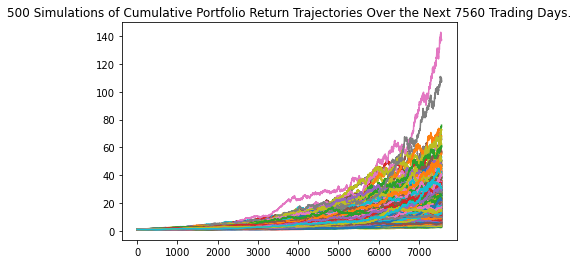

In [19]:
# Plot simulation outcomes
line_plot_30_yrs = MC_30_yrs.plot_simulation()

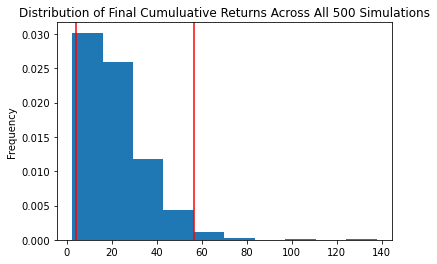

In [20]:
# Plot probability distribution and confidence intervals
dist_plot_30_yrs = MC_30_yrs.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_30_yrs = MC_30_yrs.summarize_cumulative_return()

# Print summary statistics
print(tbl_30_yrs)

count           500.000000
mean             22.153490
std              14.816419
min               2.481746
25%              11.601309
50%              18.821925
75%              29.227618
max             137.611958
95% CI Lower      4.345756
95% CI Upper     56.470152
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_30_yrs = round(tbl_30_yrs['95% CI Lower']*initial_investment, 2)
ci_upper_30_yrs = round(tbl_30_yrs['95% CI Upper']*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30_yrs} and ${ci_upper_30_yrs}.")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $86915.12 and $1129403.03.


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_30_yrs = round(tbl_30_yrs['95% CI Lower']*initial_investment, 2)
ci_upper_30_yrs = round(tbl_30_yrs['95% CI Upper']*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30_yrs} and ${ci_upper_30_yrs}.")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $130372.68 and $1694104.55.


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Adjust the portfolio to have a higher stock to bond ratio (higher risk)
num_yrs_forecast = 5
MC_5_yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.3, 0.7],
    num_simulation = 500,
    num_trading_days = 252*num_yrs_forecast
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Vincent\Documents\Coding\repos\financial-planner\src\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014124,1.021120,0.991845,1.007682,1.025010,1.006673,1.010281,1.016921,1.004261,1.006302,...,0.989117,0.986688,1.008894,0.994652,0.998387,0.993073,1.007514,0.997964,1.006237,1.008855
2,1.011126,1.023993,0.984834,1.030047,1.023587,0.998155,1.027223,1.014082,1.003953,1.000606,...,0.979816,0.983386,1.025082,0.988175,1.002305,0.992523,1.010836,0.993013,1.005665,0.995884
3,1.009186,1.026457,0.990921,1.020971,1.016280,1.006258,1.028704,1.022154,1.003671,0.985253,...,0.994295,0.968867,1.030803,1.007624,0.997496,1.005141,1.015697,0.997946,1.007613,1.002859
4,1.009376,1.027296,0.980174,1.016727,1.011613,1.005224,1.041353,1.030975,1.009631,0.981074,...,0.999436,0.968431,1.024324,1.008162,0.996781,1.000156,1.021481,1.007721,0.990086,0.994876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.552954,1.717683,1.531045,1.433366,1.688297,1.560895,2.038720,1.794872,1.548919,1.256077,...,1.870731,1.698661,1.456678,1.402136,1.653202,1.324868,2.305865,2.422703,1.795538,2.522184
1257,1.552327,1.698735,1.518377,1.434370,1.703301,1.559244,2.036951,1.781549,1.531148,1.258919,...,1.891786,1.706639,1.459513,1.403521,1.664749,1.340094,2.323599,2.407051,1.798577,2.502581
1258,1.564314,1.696548,1.508744,1.428351,1.675647,1.551459,2.035048,1.789725,1.542123,1.267472,...,1.865280,1.698024,1.490269,1.386892,1.663051,1.341719,2.304091,2.438149,1.796329,2.508518
1259,1.558135,1.687259,1.519384,1.419458,1.655437,1.561466,2.052130,1.814582,1.544187,1.262296,...,1.859491,1.696321,1.492210,1.368098,1.672058,1.340824,2.290527,2.424402,1.810332,2.476890


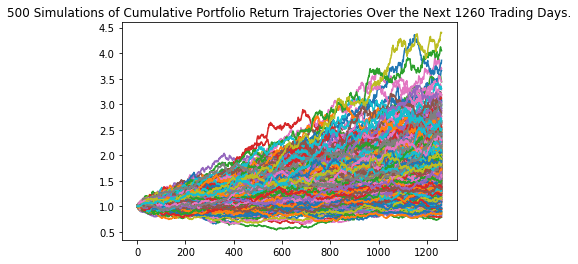

In [26]:
# Plot simulation outcomes
line_plot_5_yrs = MC_5_yrs.plot_simulation()

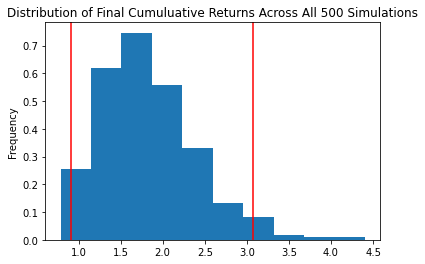

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_5_yrs = MC_5_yrs.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5_yrs = MC_5_yrs.summarize_cumulative_return()

# Print summary statistics
print(tbl_5_yrs)

count           500.000000
mean              1.823247
std               0.564513
min               0.785838
25%               1.418208
50%               1.752764
75%               2.134288
max               4.402528
95% CI Lower      0.915515
95% CI Upper      3.068842
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5_yrs = round(tbl_5_yrs['95% CI Lower']*initial_investment, 2)
ci_upper_5_yrs = round(tbl_5_yrs['95% CI Upper']*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5_yrs} and ${ci_upper_5_yrs}.")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54930.89 and $184130.49.


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_yrs_forecast = 10
MC_10_yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.3, 0.7],
    num_simulation = 500,
    num_trading_days = 252*num_yrs_forecast
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Vincent\Documents\Coding\repos\financial-planner\src\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993146,0.997960,1.003801,1.004388,1.019964,1.005038,0.993259,0.991180,0.993501,0.993233,...,0.995751,0.989852,0.988435,1.006999,0.998835,0.996519,0.986816,0.994785,1.002573,1.007636
2,0.987438,1.008283,1.013306,1.004543,1.015663,1.006343,0.986395,0.997974,1.000421,0.988532,...,0.986618,0.989742,0.993427,1.020021,1.004170,1.012649,0.988570,0.999722,0.982360,1.001855
3,0.984255,1.011348,1.014507,1.015974,1.021937,1.013557,0.998468,0.978555,1.020110,0.996816,...,0.983094,0.993331,1.003825,1.018407,1.000157,1.012310,1.013084,1.006540,0.974798,1.020977
4,0.990568,1.017348,1.017823,1.003879,1.023488,1.015705,1.007208,0.978374,1.019949,0.997974,...,0.971128,0.982575,1.020439,1.011857,1.009040,1.002751,0.995297,1.019221,0.961178,1.010603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.268418,3.098969,3.011366,2.983115,1.670702,4.731274,4.274477,2.199611,1.751212,1.979334,...,3.937457,2.135807,2.563087,4.070610,3.664769,2.535443,3.583515,9.381418,3.592203,3.017925
2517,3.291479,3.109214,2.994026,2.986045,1.678858,4.769281,4.335934,2.205920,1.760662,1.992756,...,3.926864,2.137988,2.541617,4.078118,3.704110,2.531516,3.577036,9.350714,3.604204,3.013321
2518,3.336691,3.121609,3.060854,3.018241,1.670520,4.749266,4.391260,2.201058,1.741628,1.992753,...,3.927339,2.139165,2.560798,4.074477,3.683371,2.539802,3.535570,9.336464,3.596325,3.016604
2519,3.340397,3.112279,3.090078,3.009040,1.656533,4.692461,4.397360,2.165509,1.755425,2.009779,...,3.997341,2.143442,2.572542,4.141423,3.654965,2.550081,3.504423,9.390083,3.616301,3.046990


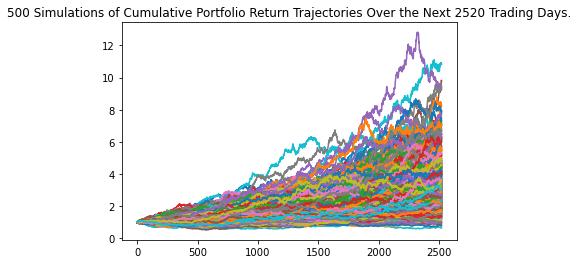

In [32]:
# Plot simulation outcomes
line_plot_10_yrs = MC_10_yrs.plot_simulation()

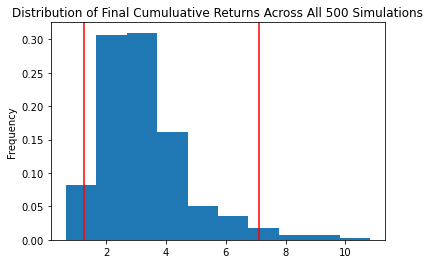

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_10_yrs = MC_10_yrs.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10_yrs = MC_10_yrs.summarize_cumulative_return()

# Print summary statistics
print(tbl_10_yrs)

count           500.000000
mean              3.281423
std               1.519318
min               0.637669
25%               2.216076
50%               3.066749
75%               3.943042
max              10.835567
95% CI Lower      1.252560
95% CI Upper      7.112010
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10_yrs = round(tbl_10_yrs['95% CI Lower']*initial_investment, 2)
ci_upper_10_yrs = round(tbl_10_yrs['95% CI Upper']*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10_yrs} and ${ci_upper_10_yrs}.")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $75153.61 and $426720.62.
